In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Assignment part-1 plotting the wine data
wine_data = np.loadtxt("wine.data", delimiter = ",")
print(wine_data.shape)

# Dividing the data into features and target
target = wine_data[:, 0]
features = wine_data[:,1:]
print(features.shape)


(178, 14)
(178, 13)


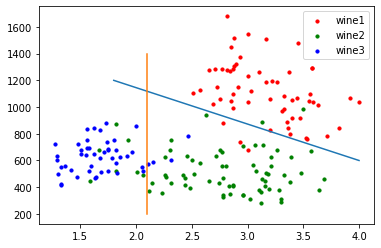

In [92]:
# Using scatter plot to plot feature 11 and 12
plt.scatter(features[:59,11],features[:59,12], \
            s=10, c='r', label = "wine1")
plt.scatter(features[59:130,11],features[59:130,12], \
            s=10, c='g', label = "wine2")
plt.scatter(features[130:,11],features[130:,12], \
            s=10, c='b', label = "wine3")
plt.legend(loc='upper right');

# plotting the two lines using manual estimation
plt.plot([4.0,1.8], [600,1200])
plt.plot([2.1,2.1],[200,1400])
plt.show()

In [93]:
# manual error rate calculation
wine1_errpts = 3
wine2_errpts = 9
wine3_errpts = 4
err_rate=((wine1_errpts+wine2_errpts+wine2_errpts)/178)*100
print(err_rate)

11.797752808988763


(1223, 933, 3)

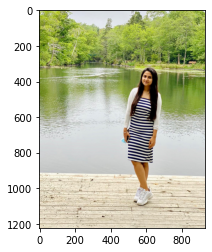

In [94]:
# Assignment part-2 plotting image and applying filters
img = plt.imread('img2.jpg')
plt.imshow(img)
img.shape

(1223, 933)

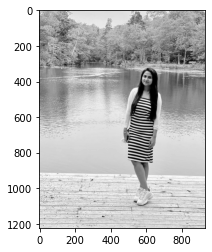

In [95]:
# converting image to grayscale
# RGB weights are referred from : https://www.kite.com/python
gray_img = np.dot(img[... , :3] , [0.299 , 0.587, 0.114]) 
plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
gray_img.shape

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


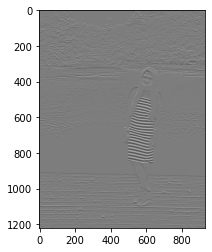

In [96]:
# Applying Horizontal filter on Image
# Horizonal and Vertical kernels are referred from: http://www.adeveloperdiary.com
# /data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/
horizontal_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print(horizontal_filter)
horizontal_edge_img=np.zeros((1221,931))
for i in range(931):
    for j in range(1221):
        horizontal_edge_img[j,i]=np.sum(horizontal_filter*gray_img[j:j+3,i:i+3])         
plt.imshow(horizontal_edge_img, cmap='gray')

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


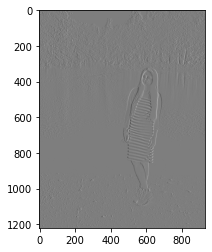

In [97]:
# Applying Vertical filter on Image
vertical_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(vertical_filter)
vertical_edge_img=np.zeros((1221,931))
for i in range(931):
    for j in range(1221):
        vertical_edge_img[j,i]=np.sum(vertical_filter*gray_img[j:j+3,i:i+3])         
plt.imshow(vertical_edge_img, cmap='gray')

In [98]:
# computing gaussian kernel
sigma=10
k=6
kernel = [np.exp(-x*x/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma) for x in range(-k,k+1)] 
gaussian_filer = np.outer(kernel, kernel)
print (gaussian_filer.shape)

(13, 13)


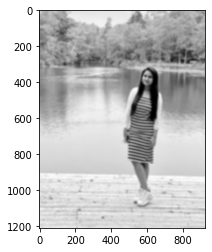

In [99]:
# applying gaussian blur filter on image
guassian_blur_img=np.zeros((1211,921))
for i in range(921):
    for j in range(1211):
        guassian_blur_img[j,i]=np.sum(gaussian_filer*gray_img[j:j+13,i:i+13])         
plt.imshow(guassian_blur_img, cmap='gray')